<a href="https://colab.research.google.com/github/piyushmways/Feature-Engineering-/blob/main/logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ***Description***

The company is a fastest growing Brand in logistics operations in India. Data Science Team aims to improve quality, efficiency and profitablity of their business through the devolepment of  Machine Learning models.

---



The primary focus of this business case is to undertake *feature engineering* and data transformation processes to prepare the data for modeling purposes. Once this is completed, the data can be transferred to the Data Science Team. Additionally, conducting exploratory data analysis will be essential to generate valuable insights backed by data.

---




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,ttest_rel

In [ ]:
!gdown 11BH6QMGhLawKemFpteB6fuXnlEwLJ2Hh

Downloading...
From: https://drive.google.com/uc?id=11BH6QMGhLawKemFpteB6fuXnlEwLJ2Hh
To: /content/delhivery.csv
100% 55.6M/55.6M [00:00<00:00, 225MB/s]


In [ ]:
!gdown 1P1dozAHR4eHJIJhUoqa-68SUWHc9-OtsVaprO_DAlmk

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1P1dozAHR4eHJIJhUoqa-68SUWHc9-OtsVaprO_DAlmk 



In [ ]:
original_data=pd.read_csv("/content/delhivery.csv")

In [ ]:
##lets create a copy to avoid any unwanted changes in original data
df=original_data.copy()
pd.set_option('display.max_columns', None)
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


#A. Preprocessing of Data

A.1 Basic information of dataset

In [ ]:
df.shape

(144867, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


A.2 drop Meaningless columns in the Dataframe

In [ ]:
## 5 columns namely is_cutoff,cutoff_factor,cutoff_timestamp,factor and segment factor are unknown and can not be used for analysis
##so We can drop these columns,
df.drop(columns=['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor'],inplace=True)

In [ ]:
##Lets rearrange the columns in a logical sequence
df=df.iloc[:,[4,2,3,5,6,7,8,17,16,13,14,1,9,10,11,18,15,12,0]]

In [ ]:
df.head()

,trip_uuid,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,segment_osrm_time,segment_actual_time,actual_time,osrm_time,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,segment_osrm_distance,osrm_distance,actual_distance_to_destination,data
0,trip-153741093647649320,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),11.0,14.0,14.0,11.0,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,11.9653,11.9653,10.435660,training
1,trip-153741093647649320,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),9.0,10.0,24.0,20.0,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,9.7590,21.7243,18.936842,training
2,trip-153741093647649320,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),7.0,16.0,40.0,28.0,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.8152,32.5395,27.637279,training
3,trip-153741093647649320,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),12.0,21.0,62.0,40.0,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,13.0224,45.5620,36.118028,training
4,trip-153741093647649320,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),5.0,6.0,68.0,44.0,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,3.9153,54.2181,39.386040,training


A.3 **Conversion of datatype into appropriate datatype**

In [ ]:
##changing the data types of some columns to  datetime
df['trip_creation_time']=pd.to_datetime(df['trip_creation_time'])

In [ ]:
df=df.astype({'od_start_time':"datetime64[ns]","od_end_time":"datetime64[ns]"})
df.dtypes

trip_uuid                                 object
route_schedule_uuid                       object
route_type                                object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
segment_osrm_time                        float64
segment_actual_time                      float64
actual_time                              float64
osrm_time                                float64
trip_creation_time                datetime64[ns]
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
segment_osrm_distance                    float64
osrm_distance                            float64
actual_distance_to_destination           float64
data                                      object
dtype: object

A.4 Checking duplicates in dataframes

In [ ]:
df[df.duplicated()]
#hence no duplicate entry

,trip_uuid,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,segment_osrm_time,segment_actual_time,actual_time,osrm_time,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,segment_osrm_distance,osrm_distance,actual_distance_to_destination,data


A.5 Missing Value Detection

In [ ]:
#number of missing values in columns
df.isnull().sum()

trip_uuid                           0
route_schedule_uuid                 0
route_type                          0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
segment_osrm_time                   0
segment_actual_time                 0
actual_time                         0
osrm_time                           0
trip_creation_time                  0
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
segment_osrm_distance               0
osrm_distance                       0
actual_distance_to_destination      0
data                                0
dtype: int64

In [ ]:
##percentage of missing values
round(df.isnull().sum()/df.shape[0]*100,2)

trip_uuid                         0.00
route_schedule_uuid               0.00
route_type                        0.00
source_center                     0.00
source_name                       0.20
destination_center                0.00
destination_name                  0.18
segment_osrm_time                 0.00
segment_actual_time               0.00
actual_time                       0.00
osrm_time                         0.00
trip_creation_time                0.00
od_start_time                     0.00
od_end_time                       0.00
start_scan_to_end_scan            0.00
segment_osrm_distance             0.00
osrm_distance                     0.00
actual_distance_to_destination    0.00
data                              0.00
dtype: float64

In [ ]:
#since the percentage of missing values is very low, we may delete such values.
df.dropna(how='any',inplace=True)

In [ ]:
df.isnull().sum()

trip_uuid                         0
route_schedule_uuid               0
route_type                        0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
segment_osrm_time                 0
segment_actual_time               0
actual_time                       0
osrm_time                         0
trip_creation_time                0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
segment_osrm_distance             0
osrm_distance                     0
actual_distance_to_destination    0
data                              0
dtype: int64

<ipython-input-26-67feb3c73908>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='flare',annot=True)


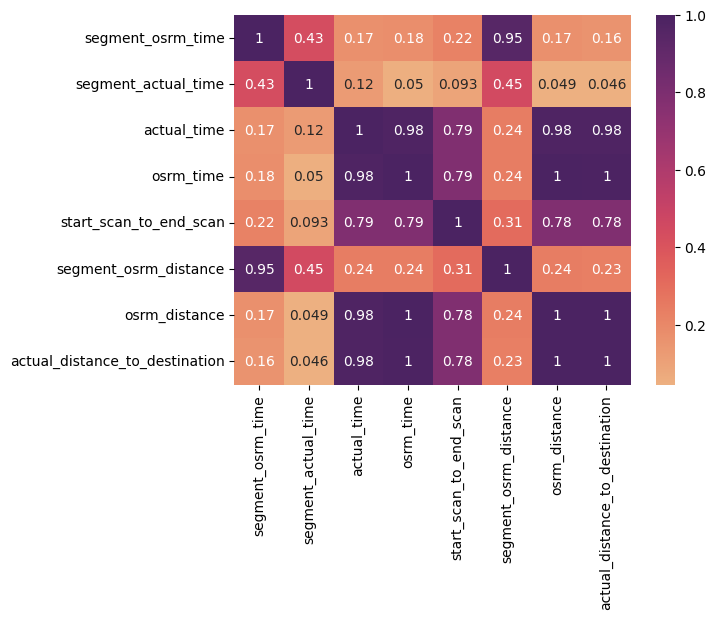

In [ ]:
sns.heatmap(df.corr(),cmap='flare',annot=True)
plt.show()

Note:
---
1. it is strange to observe that segment_osrm time and segment_actual time are weakly coorelated.
2. So we should Explore these features at
                                        1.   Complete Trip level: where trip gets complete
                                        2.   Subjourney level: when source and destination changes but trip remains same




# B. Exploratory  Data Anaysis

What is the duration of time of dataset?

In [ ]:
np.max(df['trip_creation_time'])-np.min(df['trip_creation_time'])
#we have 21 days long data, which is smaller length of time.

Timedelta('21 days 23:59:26.165951')

# B.1.**Analysis at Trip level**

B.1.1.What is the total time taken by a trip to complete?

In [ ]:
#it may be noted that actual_time is cummulative value but changes as destination changes at sub_journey_level
#we may create a new column for commulative time for whole trip
##lets create a new column "trip_completetion_actual_time" which tell time taken to complete a trip
df.set_index('trip_uuid',inplace=True)
df['trip_completion_actual_time']=df.groupby(['trip_uuid'])['segment_actual_time'].sum() #new column for answer
df.reset_index(inplace=True)
df.head(2)

,trip_uuid,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,segment_osrm_time,segment_actual_time,actual_time,osrm_time,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,segment_osrm_distance,osrm_distance,actual_distance_to_destination,data,trip_completion_actual_time
0,trip-153741093647649320,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),11.0,14.0,14.0,11.0,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,11.9653,11.9653,10.435660,training,167.0
1,trip-153741093647649320,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),9.0,10.0,24.0,20.0,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,9.7590,21.7243,18.936842,training,167.0


B.1.1.1 what is average time taken to complete a trip?

In [ ]:
df['trip_completion_actual_time'].mean()

1075.7724992377837

B.1.2.What is osmr time taken to complete a trip?

In [ ]:
#lets create a new column "trip_completion_osmr_time"
df.set_index('trip_uuid',inplace=True)
df['trip_completion_osrm_time']=df.groupby(['trip_uuid'])['segment_osrm_time'].sum()
df.reset_index(inplace=True)

What is avg time estimated to complete a trip by osrm system?

In [ ]:
df['trip_completion_osrm_time'].mean()

605.9946367693118

In [ ]:
df.head(2)

,trip_uuid,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,segment_osrm_time,segment_actual_time,actual_time,osrm_time,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,segment_osrm_distance,osrm_distance,actual_distance_to_destination,data,trip_completion_actual_time,trip_completion_osrm_time
0,trip-153741093647649320,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),11.0,14.0,14.0,11.0,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,11.9653,11.9653,10.435660,training,167.0,88.0
1,trip-153741093647649320,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),9.0,10.0,24.0,20.0,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,9.7590,21.7243,18.936842,training,167.0,88.0


*B.1.*3.What is total distance of Trip

In [ ]:
#lets create a new column "trip_total_distance"
a=df.groupby(['trip_uuid','source_center','destination_center'])['actual_distance_to_destination'].max() #sum at sub_jorney_level
a

trip_uuid                source_center  destination_center
trip-153671041653548748  IND209304AAA   IND000000ACB          383.759164
                         IND462022AAA   IND209304AAA          440.973689
trip-153671042288605164  IND561203AAB   IND562101AAA           24.644021
                         IND572101AAA   IND561203AAB           48.542890
trip-153671043369099517  IND000000ACB   IND160002AAC          242.309306
                                                                 ...    
trip-153861115439069069  IND628204AAA   IND627657AAA           33.627182
                         IND628613AAA   IND627005AAA           33.673835
                         IND628801AAA   IND628204AAA           12.661945
trip-153861118270144424  IND583119AAA   IND583101AAA           40.546740
                         IND583201AAA   IND583119AAA           25.534793
Name: actual_distance_to_destination, Length: 26222, dtype: float64

In [ ]:
a.groupby(['trip_uuid']).sum()

trip_uuid
trip-153671041653548748     824.732854
trip-153671042288605164      73.186911
trip-153671043369099517    1932.273969
trip-153671046011330457      17.175274
trip-153671052974046625     127.448500
                              ...     
trip-153861095625827784      57.762332
trip-153861104386292051      15.513784
trip-153861106442901555      38.684839
trip-153861115439069069     134.723836
trip-153861118270144424      66.081533
Name: actual_distance_to_destination, Length: 14787, dtype: float64

In [ ]:
df.set_index('trip_uuid',inplace=True) #converting index same as a
df['trip_total_distance']=a.groupby(['trip_uuid']).sum()  #creating new column for ans
df.head(2)


,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,segment_osrm_time,segment_actual_time,actual_time,osrm_time,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,segment_osrm_distance,osrm_distance,actual_distance_to_destination,data,trip_completion_actual_time,trip_completion_osrm_time,trip_total_distance
trip_uuid,,,,,,,,,,,,,,,,,,,,,
trip-153741093647649320,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),11.0,14.0,14.0,11.0,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,11.9653,11.9653,10.435660,training,167.0,88.0,82.981842
trip-153741093647649320,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),9.0,10.0,24.0,20.0,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,9.7590,21.7243,18.936842,training,167.0,88.0,82.981842


In [ ]:
df.reset_index(inplace=True)
df.head(2)


,trip_uuid,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,segment_osrm_time,segment_actual_time,actual_time,osrm_time,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,segment_osrm_distance,osrm_distance,actual_distance_to_destination,data,trip_completion_actual_time,trip_completion_osrm_time,trip_total_distance
0,trip-153741093647649320,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),11.0,14.0,14.0,11.0,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,11.9653,11.9653,10.435660,training,167.0,88.0,82.981842
1,trip-153741093647649320,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),9.0,10.0,24.0,20.0,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,9.7590,21.7243,18.936842,training,167.0,88.0,82.981842


what is avg distance covered to complete a trip

In [ ]:
df['trip_total_distance'].mean()

581.2296705476517

B.1.4.What is osmr distance for a trip?

In [ ]:
a=df.groupby(['trip_uuid'])['segment_osrm_distance'].sum()
a

trip_uuid
trip-153671041653548748    1320.4733
trip-153671042288605164      84.1894
trip-153671043369099517    2545.2678
trip-153671046011330457      19.8766
trip-153671052974046625     146.7919
                             ...    
trip-153861095625827784      64.8551
trip-153861104386292051      16.0883
trip-153861106442901555     104.8866
trip-153861115439069069     223.5324
trip-153861118270144424      80.5787
Name: segment_osrm_distance, Length: 14787, dtype: float64

In [ ]:
#setting same index for a and df
df.set_index('trip_uuid',inplace=True)

In [ ]:
df["trip_completion_osrm_distnace"]=a  # creating new column

In [ ]:
df.reset_index(inplace=True)
df.head(2)

,trip_uuid,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,segment_osrm_time,segment_actual_time,actual_time,osrm_time,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,segment_osrm_distance,osrm_distance,actual_distance_to_destination,data,trip_completion_actual_time,trip_completion_osrm_time,trip_total_distance,trip_completion_osrm_distnace
0,trip-153741093647649320,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),11.0,14.0,14.0,11.0,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,11.9653,11.9653,10.435660,training,167.0,88.0,82.981842,102.7106
1,trip-153741093647649320,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),9.0,10.0,24.0,20.0,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,9.7590,21.7243,18.936842,training,167.0,88.0,82.981842,102.7106


what is avg distance of a trip by osrm system?

In [ ]:
df["trip_completion_osrm_distnace"].mean()

788.5963774515646

B.1.5.Is osrm software estimates are matching with actual values at Trip Level?


In [ ]:
check=df[['trip_completion_actual_time',"trip_completion_osrm_time","trip_total_distance","trip_completion_osrm_distnace"]]
check=check.copy()
check.head()
##in the output, it seems that there is significant difference in actual and osrm estimates of trip distance and trip time

,trip_completion_actual_time,trip_completion_osrm_time,trip_total_distance,trip_completion_osrm_distnace
0,167.0,88.0,82.981842,102.7106
1,167.0,88.0,82.981842,102.7106
2,167.0,88.0,82.981842,102.7106
3,167.0,88.0,82.981842,102.7106
4,167.0,88.0,82.981842,102.7106


In [ ]:
check.drop_duplicates(keep='first',inplace=True)
check.head()


,trip_completion_actual_time,trip_completion_osrm_time,trip_total_distance,trip_completion_osrm_distnace
0,167.0,88.0,82.981842,102.7106
10,180.0,106.0,100.708423,130.4089
15,60.0,16.0,16.431273,18.7941
17,799.0,502.0,371.458435,560.5092
35,151.0,137.0,95.488499,115.7501


B.1.5.1  Hypothesis testing of osrm estimates at Trip level

Checking Estimates of Time





In [ ]:
##lets try to clear this confusion, for this we may perform t-test.
##H0: there is no difference between trip_completetion_actual_time and trip_completetion_osrm_time
##Ha: there is significant difference between trip_completetion_actual_time and trip_completetion_osrm_time
ttest_rel(check["trip_completion_actual_time"],check["trip_completion_osrm_time"],alternative='two-sided')
#hence we reject the null hypothesis testing
##which means the osrm and actual time is significantly different, and it is not good for customer satisfaction.

TtestResult(statistic=76.69795351522608, pvalue=0.0, df=14775)

Checking Estimates of Distance

In [ ]:
#lets check distance also
#H0: there is no difference between trip_total_distance and	trip_completion_osrm_distnace
#Ha: there is significant difference between trip_total_distance and	trip_completion_osrm_distnace
ttest_rel(check["trip_total_distance"],check["trip_completion_osrm_distnace"],alternative='two-sided')
#hence we reject the null hypothesis
#which means that osrm distance and actual distance are significantly different
# this may lead to loss in the business and inaccurate anticipation of profit in the business.

TtestResult(statistic=-59.86892006468175, pvalue=0.0, df=14775)

Visualization of time and Distance on Trip level

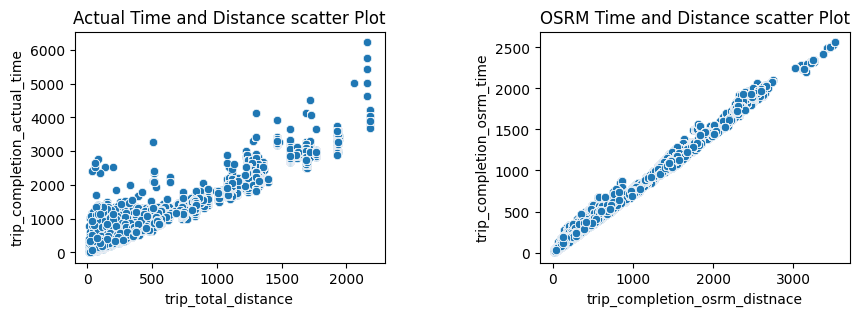

In [ ]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.scatterplot(data=df,y='trip_completion_actual_time',x="trip_total_distance")
plt.title('Actual Time and Distance scatter Plot')


plt.subplot(1,2,2)
sns.scatterplot(data=df,y='trip_completion_osrm_time',x="trip_completion_osrm_distnace")
plt.title('OSRM Time and Distance scatter Plot')

plt.subplots_adjust(wspace=0.5,hspace=0.3)
plt.show()

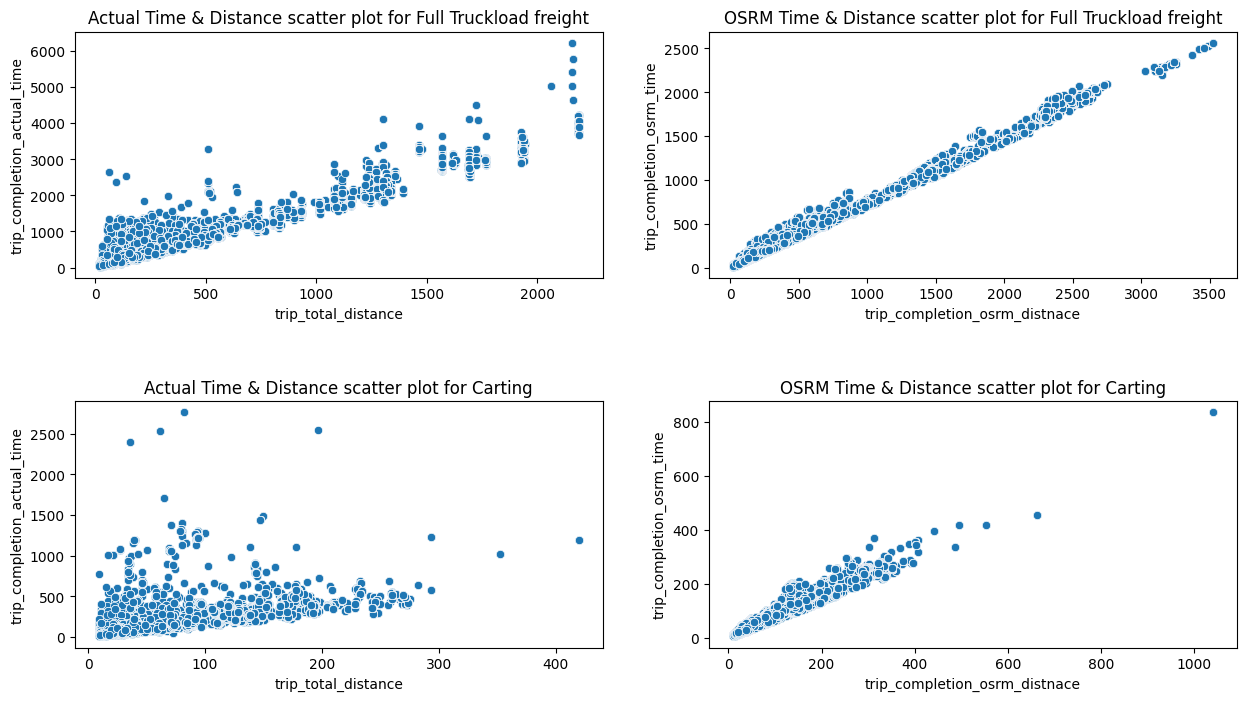

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.scatterplot(data=df[df['route_type']=='FTL'],y='trip_completion_actual_time',x="trip_total_distance")
plt.title('Actual Time & Distance scatter plot for Full Truckload freight')


plt.subplot(2,2,2)
sns.scatterplot(data=df[df['route_type']=='FTL'],y='trip_completion_osrm_time',x="trip_completion_osrm_distnace")
plt.title('OSRM Time & Distance scatter plot for Full Truckload freight')


plt.subplot(2,2,3)
sns.scatterplot(data=df[df['route_type']=='Carting'],y='trip_completion_actual_time',x="trip_total_distance")
plt.title('Actual Time & Distance scatter plot for Carting')



plt.subplot(2,2,4)
sns.scatterplot(data=df[df['route_type']=='Carting'],y='trip_completion_osrm_time',x="trip_completion_osrm_distnace")
plt.title('OSRM Time & Distance scatter plot for Carting')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [ ]:
#it may be noted that osrm model is same for FTL and carting
#ideally it must differentiate both as FTL is faster than Carting

Insights of trip level analysis:

---




        1. Since osrm estimates of time and distance are not matching with actual time & distance.

        2. hence osrm software need to be improved
        3. OSRM system is not differentiating Full truck freight and carting, although carting is slower FTL. but OSRM fails to capture that.

# B.2 **Analysis at sub journey level**

In [ ]:
#it may be observed here that there is minor error in cummulation of osrm_time(28 instead of 27),actual_time(62 instead of 61),osrm_distance(54.2118 instead of 49.4772)
#so lets try to perform our own cumsum() and cross check if these errors are significant or not
df[["trip_uuid",
    "source_center","destination_center",
    "segment_osrm_time","osrm_time","segment_actual_time","actual_time",
    "segment_osrm_distance","osrm_distance","segment_osrm_distance","osrm_distance"]].head(8)

,trip_uuid,source_center,destination_center,segment_osrm_time,osrm_time,segment_actual_time,actual_time,segment_osrm_distance,osrm_distance,segment_osrm_distance,osrm_distance
0,trip-153741093647649320,IND388121AAA,IND388620AAB,11.0,11.0,14.0,14.0,11.9653,11.9653,11.9653,11.9653
1,trip-153741093647649320,IND388121AAA,IND388620AAB,9.0,20.0,10.0,24.0,9.7590,21.7243,9.7590,21.7243
2,trip-153741093647649320,IND388121AAA,IND388620AAB,7.0,28.0,16.0,40.0,10.8152,32.5395,10.8152,32.5395
3,trip-153741093647649320,IND388121AAA,IND388620AAB,12.0,40.0,21.0,62.0,13.0224,45.5620,13.0224,45.5620
4,trip-153741093647649320,IND388121AAA,IND388620AAB,5.0,44.0,6.0,68.0,3.9153,54.2181,3.9153,54.2181
5,trip-153741093647649320,IND388620AAB,IND388320AAA,11.0,11.0,15.0,15.0,12.1171,12.1171,12.1171,12.1171
6,trip-153741093647649320,IND388620AAB,IND388320AAA,6.0,17.0,28.0,44.0,9.1719,21.2890,9.1719,21.2890
7,trip-153741093647649320,IND388620AAB,IND388320AAA,11.0,29.0,21.0,65.0,14.5362,35.8252,14.5362,35.8252


B.2.1 Merging 3 columns to form a unique column at sub_journey Level

In [ ]:
#lets create a unique column at sub journey level
df['sub_journey_key']=df['trip_uuid']+df['source_center']+df['destination_center']

B.2.2 Cummulative sum at sub Journey level and creating a few feature for each

In [ ]:
columns=["segment_osrm_time",'segment_osrm_distance','segment_actual_time']
for col in columns:
  df[col+"_cumsum"]=df.groupby(['sub_journey_key'])[col].cumsum()

In [ ]:
df[["osrm_time","segment_osrm_time_cumsum",
    'osrm_distance','segment_osrm_distance_cumsum',
    'actual_time','segment_actual_time_cumsum']].head(8)


,osrm_time,segment_osrm_time_cumsum,osrm_distance,segment_osrm_distance_cumsum,actual_time,segment_actual_time_cumsum
0,11.0,11.0,11.9653,11.9653,14.0,14.0
1,20.0,20.0,21.7243,21.7243,24.0,24.0
2,28.0,27.0,32.5395,32.5395,40.0,40.0
3,40.0,39.0,45.5620,45.5619,62.0,61.0
4,44.0,44.0,54.2181,49.4772,68.0,67.0
5,11.0,11.0,12.1171,12.1171,15.0,15.0
6,17.0,17.0,21.2890,21.2890,44.0,43.0
7,29.0,28.0,35.8252,35.8252,65.0,64.0


B.2.3 Hypothesis Testing for checking errors in cummulation

"osrm_time" vs  "segment_osrm_time_cumsum"

In [ ]:
#H0: there is no difference between 2 columns
#H1: there is significant difference
ttest_rel(df["osrm_time"],df["segment_osrm_time_cumsum"],alternative='two-sided')
#hence reject the null hypothesis and there was significant error in cummalation

TtestResult(statistic=-161.06722278467097, pvalue=0.0, df=144315)

"osrm_distance" VS  segment_osrm_distance_cumsum

In [ ]:
#H0: there is no difference between 2 columns
#H1: there is significant difference
ttest_rel(df["osrm_distance"],df["segment_osrm_distance_cumsum"],alternative='two-sided')
#hence reject the null hypothesis and there was significant error in cummalation

TtestResult(statistic=-154.82725827814107, pvalue=0.0, df=144315)

"actual_time" VS  'segment_actual_time_cumsum'

In [ ]:
#H0: there is no difference between 2 columns
#H1: there is significant difference
ttest_rel(df["actual_time"],df['segment_actual_time_cumsum'],alternative='two-sided')
#hence reject the null hypothesis and there was significant error in cummalation

TtestResult(statistic=246.5138719124651, pvalue=0.0, df=144315)

B.2.3   Hypothesis Testing for checking if osrm estimates matches with actual values at sub journey level

In [ ]:
#to do the same we should bring down data at subjourney level
sub_journey_dict={
              'data':'first',
              'sub_journey_key' : 'last',
              "trip_creation_time":'first',
              'trip_uuid':'last',
              'route_schedule_uuid':'last',
              'route_type':'last',

              'source_center':'last',
              'source_name':'last',
              'destination_center':'last',
              'destination_name':'last',



              'od_start_time':'first',
              'od_end_time':'first',
              'start_scan_to_end_scan':'last',
               "osrm_time":'last',
              'actual_time':'last',
              "segment_osrm_time_cumsum":'last',
              "segment_actual_time_cumsum":'last',

              "osrm_distance":'last',
              "segment_osrm_distance_cumsum":'last',
              'actual_distance_to_destination':'last'
              }

sub_journey_data=df.groupby('sub_journey_key').agg(sub_journey_dict)
sub_journey_data.drop(columns=['sub_journey_key'],inplace=True)
sub_journey_data=sub_journey_data.reset_index()


In [ ]:
sub_journey_data[["sub_journey_key","segment_osrm_time_cumsum","segment_actual_time_cumsum","segment_osrm_distance_cumsum",'actual_distance_to_destination']].head()

,sub_journey_key,segment_osrm_time_cumsum,segment_actual_time_cumsum,segment_osrm_distance_cumsum,actual_distance_to_destination
0,trip-153671041653548748IND209304AAAIND000000ACB,534.0,728.0,670.6205,383.759164
1,trip-153671041653548748IND462022AAAIND209304AAA,474.0,820.0,649.8528,440.973689
2,trip-153671042288605164IND561203AABIND562101AAA,26.0,46.0,28.1995,24.644021
3,trip-153671042288605164IND572101AAAIND561203AAB,39.0,95.0,55.9899,48.542890
4,trip-153671043369099517IND000000ACBIND160002AAC,231.0,608.0,317.7408,237.439610


"segment_osrm_time_cumsum" VS  "segment_actual_time_cumsum"

In [ ]:
#H0: Both the features have same mean
#Ha: Both the feature are significantly different
ttest_rel(sub_journey_data["segment_osrm_time_cumsum"],sub_journey_data["segment_actual_time_cumsum"])
#hence failed to reject the null Hypothesis
#which means that they are significantly different.
#thus osrm estimates for time is not matching with actual values

TtestResult(statistic=-82.75532693066499, pvalue=0.0, df=26221)

"segment_osrm_distance_cumsum" VS  "actual_distance_to_destination"

In [ ]:
#H0: Both the columns have same mean
#Ha: Both the feature are significantly different
ttest_rel(sub_journey_data["segment_osrm_distance_cumsum"],sub_journey_data["actual_distance_to_destination"])
#hence failed to reject the null Hypothesis
#which means that they are significantly different.
#thus osrm estimates for distance is not matching with actual values

TtestResult(statistic=65.10856315271008, pvalue=0.0, df=26221)

Visualization of Time and Distance at sub Journey level

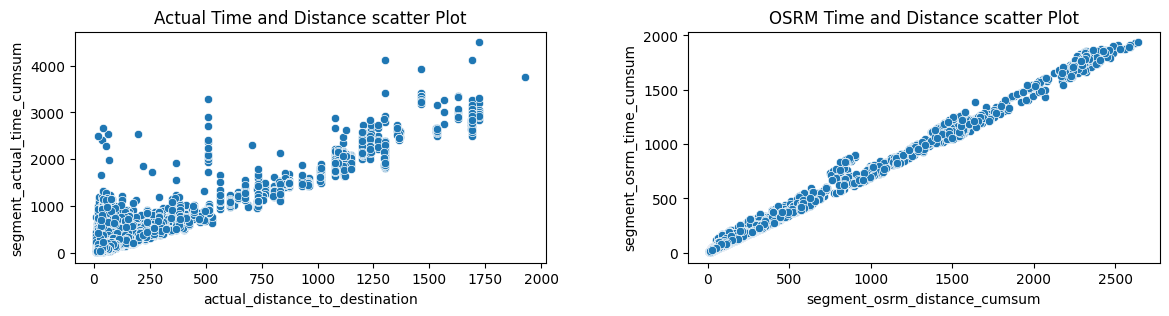

In [ ]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
sns.scatterplot(data=sub_journey_data,y="segment_actual_time_cumsum",x="actual_distance_to_destination")
plt.title('Actual Time and Distance scatter Plot')


plt.subplot(1,2,2)
sns.scatterplot(data=sub_journey_data,y='segment_osrm_time_cumsum',x="segment_osrm_distance_cumsum")
plt.title('OSRM Time and Distance scatter Plot')

plt.subplots_adjust(wspace=0.3, hspace=0.8)
plt.show()

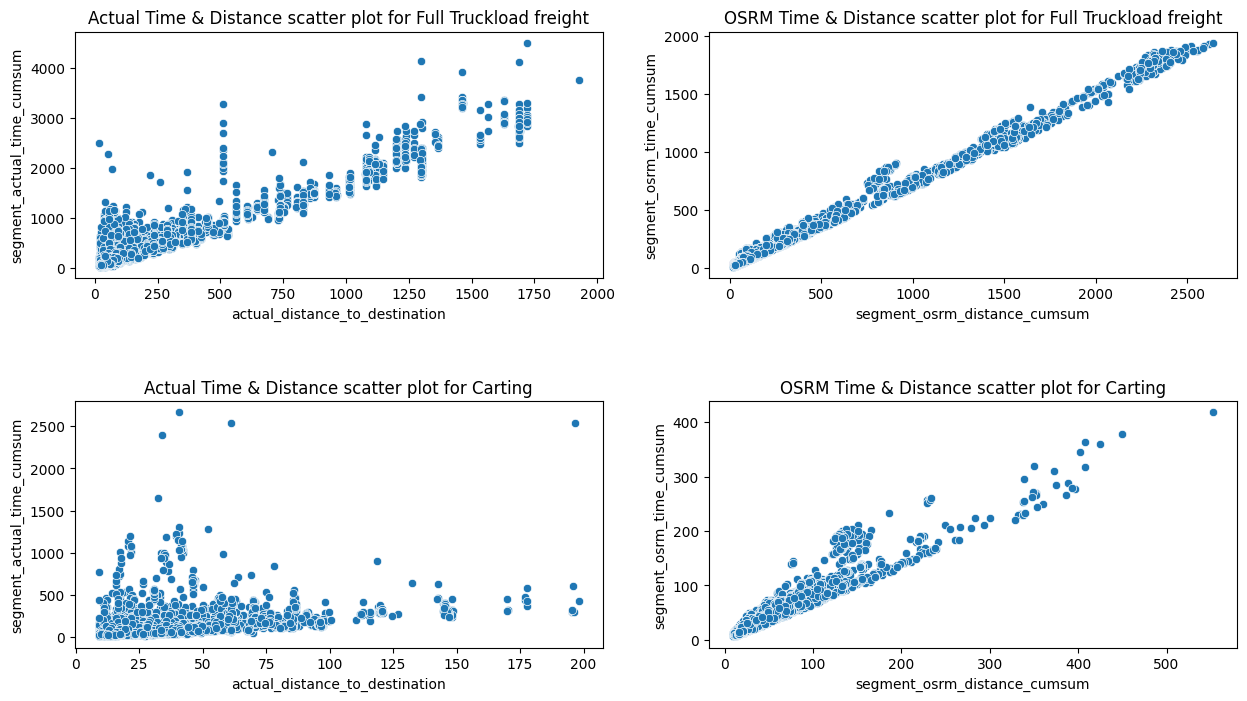

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.scatterplot(data=sub_journey_data[sub_journey_data['route_type']=='FTL'],y="segment_actual_time_cumsum",x="actual_distance_to_destination")
plt.title('Actual Time & Distance scatter plot for Full Truckload freight')


plt.subplot(2,2,2)
sns.scatterplot(data=sub_journey_data[sub_journey_data['route_type']=='FTL'],y='segment_osrm_time_cumsum',x="segment_osrm_distance_cumsum")
plt.title('OSRM Time & Distance scatter plot for Full Truckload freight')


plt.subplot(2,2,3)
sns.scatterplot(data=sub_journey_data[sub_journey_data['route_type']=='Carting'],y="segment_actual_time_cumsum",x="actual_distance_to_destination")
plt.title('Actual Time & Distance scatter plot for Carting')



plt.subplot(2,2,4)
sns.scatterplot(data=sub_journey_data[sub_journey_data['route_type']=='Carting'],y='segment_osrm_time_cumsum',x="segment_osrm_distance_cumsum")
plt.title('OSRM Time & Distance scatter plot for Carting')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [ ]:
#clealy estimates of osrm are not good for carting freight

Insight:

      1.   the osrm software estimates of time is not matching at sub-journey leval also.
      2. the osrm software estimates of distance is not matching at sub-journey leval also.

# C. Feature creation & their analysis




In [ ]:
#function to convert sorce_name/destination into their corrosponding state
def state(x):
  x=x.split("(")[1]
  x=x[:-1]
  return x
def city(x):
  x=x.split("(")[0]
  x=x.split("_")[0]
  if (x=="Bangalore") or (x=="BLR"):
    x='Bengaluru'
  if x=="Mumbai Hub ":
    x="Mumbai"
  if x=="HBR Layout PC ":
    x='Bengaluru'
  if x=="MAA":
    x='Poonamallee'

  return x


In [ ]:
#function to convert sorce_name/destination into their corrosponding place
def place(x):
  #there are entries of various kind "Surat_Central_I_4 (Gujarat)","Gurgaon_Bilaspur_HB (Haryana)","Bellary_Dc (Karnataka)","Jabalpur (Madhya Pradesh),"HBR Layout PC (Karnataka)"
  x=x.split("(")[0]
  length=len(x.split("_"))
  #that contains "_"
  if length>=3: #like "Surat_Central_I_4 (Gujarat)","Gurgaon_Bilaspur_HB (Haryana)"
    return x.split("_")[1]
  if length==2: #like "Bellary_Dc (Karnataka)"
    return x.split("_")[0]

  #that contains " " and no "_" like "Jabalpur (Madhya Pradesh),"Mumbai Hub (Maharashtra)","PNQ Rahatani DPC (Maharashtra)"
  if length==1:
    sub_length=len(x.split(" "))
    if sub_length>=3:#like "PNQ Rahatani DPC (Maharashtra)"
      return x.split(" ")[1]
    else:
      return None
  return None

In [ ]:
#function to convert sorce_name/destination into their corrosponding codes
def code(x):
  x=x.split("(")[0]
  length=len(x.split("_"))
  if length>=3:#like "Surat_Central_I_4 (Gujarat)","Gurgaon_Bilaspur_HB (Haryana)"
    return x.split("_")[-1]
  if length==2: #like "Bellary_Dc (Karnataka)"
    return x.split("_")[-1]
  else:
    return None



In [ ]:
#creating new feature for source
sub_journey_data["source_state"]=sub_journey_data['source_name'].apply(state)
sub_journey_data["source_city"]=sub_journey_data['source_name'].apply(city)
sub_journey_data["source_place"]=sub_journey_data['source_name'].apply(place)
sub_journey_data["source_code"]=sub_journey_data['source_name'].apply(code)
sub_journey_data[['source_state','source_city',"source_place",'source_code']].head()


,source_state,source_city,source_place,source_code
0,Uttar Pradesh,Kanpur,Central,6
1,Madhya Pradesh,Bhopal,Trnsport,H
2,Karnataka,Doddablpur,ChikaDPP,D
3,Karnataka,Tumkur,Veersagr,I
4,Haryana,Gurgaon,Bilaspur,HB


In [ ]:
#creating new feature for destination
sub_journey_data["destination_state"]=sub_journey_data['destination_name'].apply(state)
sub_journey_data["destination_city"]=sub_journey_data['destination_name'].apply(city)
sub_journey_data["destination_place"]=sub_journey_data['destination_name'].apply(place)
sub_journey_data["destination_code"]=sub_journey_data['destination_name'].apply(code)
sub_journey_data[['destination_state','destination_city',"destination_place",'destination_code']].head()

,destination_state,destination_city,destination_place,destination_code
0,Haryana,Gurgaon,Bilaspur,HB
1,Uttar Pradesh,Kanpur,Central,6
2,Karnataka,Chikblapur,ShntiSgr,D
3,Karnataka,Doddablpur,ChikaDPP,D
4,Punjab,Chandigarh,Mehmdpur,H


Visulization of Busiest State

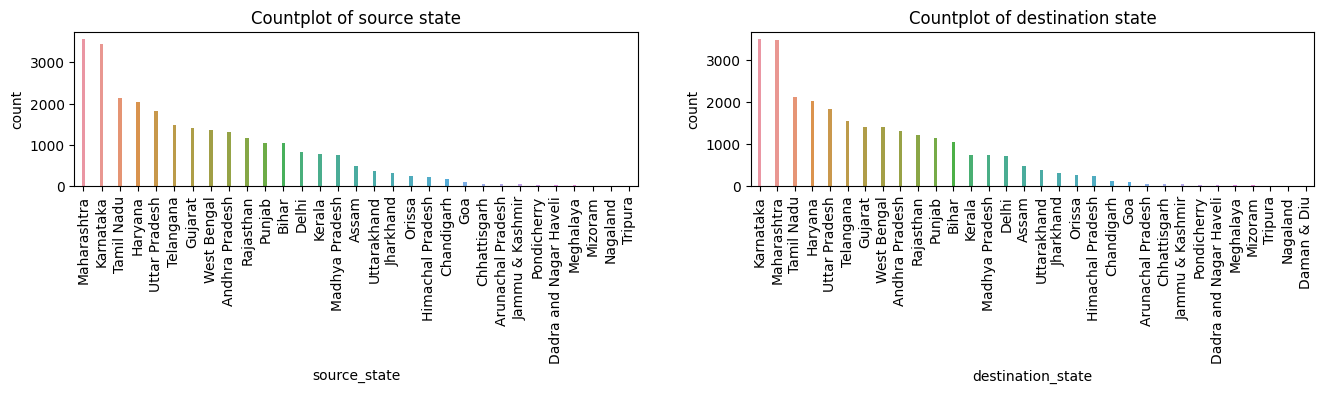

In [ ]:
plt.figure(figsize=(16,2))
plt.subplot(1,2,1)
sns.countplot(x=sub_journey_data["source_state"],width=0.2,
              order=sub_journey_data["source_state"].value_counts().index)
plt.title("Countplot of source state")
plt.xticks(rotation=90)




plt.subplot(1,2,2)
sns.countplot(x=sub_journey_data["destination_state"],width=0.2,
              order=sub_journey_data["destination_state"].value_counts().index)
plt.title("Countplot of destination state")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Creating new dataframe to explore Maharastra and Karnataka
maharashtra=sub_journey_data[(sub_journey_data['source_state']=="Maharashtra") | (sub_journey_data['destination_state']=="Maharashtra")]
karnataka=sub_journey_data[(sub_journey_data['source_state']=="Karnataka") | (sub_journey_data['destination_state']=="Karnataka")]

Visualisation for busiest cities of Maharastra and Karnataka

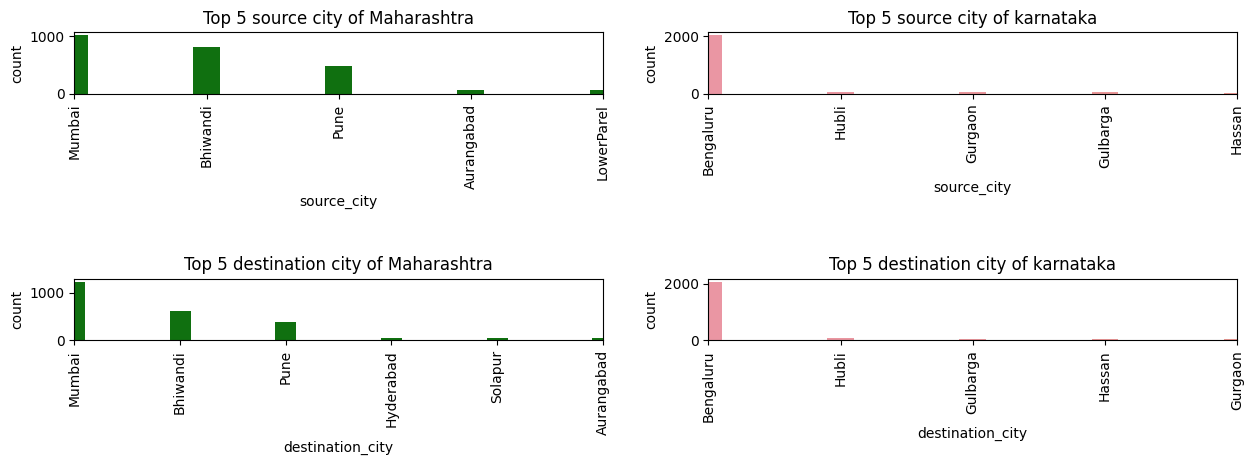

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(2,2,1)
sns.countplot(x=maharashtra["source_city"],width=0.2,color='green',
              order=maharashtra["source_city"].value_counts().index)
plt.title("Top 5 source city of Maharashtra")
plt.xticks(rotation=90)
plt.xlim(left=0,right=4)


plt.subplot(2,2,2)
sns.countplot(x=karnataka["source_city"],width=0.2,
              order=karnataka["source_city"].value_counts().index)
plt.title("Top 5 source city of karnataka")
plt.xticks(rotation=90)
plt.xlim([0,4])


plt.subplot(2,2,3)
sns.countplot(x=maharashtra["destination_city"],width=0.2,color='green',
              order=maharashtra["destination_city"].value_counts().index)
plt.title("Top 5 destination city of Maharashtra")
plt.xticks(rotation=90)
plt.xlim(left=0,right=5)



plt.subplot(2,2,4)
sns.countplot(x=karnataka["destination_city"],width=0.2,
              order=karnataka["destination_city"].value_counts().index)
plt.title("Top 5 destination city of karnataka")
plt.xticks(rotation=90,fontsize=10)
plt.xlim([0,4])

plt.subplots_adjust(wspace=0.2,hspace=3)
plt.show()

what are important cities for trip origination?

In [ ]:
sub_journey_data['source_city'].value_counts()

Bengaluru     2043
Gurgaon       1130
Mumbai        1019
Bhiwandi       821
Delhi          626
              ... 
Vizag            1
Hajipur          1
Madnapalle       1
Naharlagun       1
Kapadvanj        1
Name: source_city, Length: 1256, dtype: int64

In [ ]:
sub_journey_data['destination_city'].value_counts()

Bengaluru    2074
Mumbai       1234
Gurgaon       986
Hyderabad     643
Bhiwandi      614
             ... 
Shivpuri        1
Tamluk          1
Khamgaon        1
Parbhani        1
Lunawada        1
Name: destination_city, Length: 1252, dtype: int64

What are the top 5 longest route/route_uuid?

In [ ]:
long_route=sub_journey_data.sort_values(["actual_distance_to_destination"],ascending=False)
long_route=long_route[~(long_route[['source_city','destination_city']].duplicated())]
long_route[['source_state','source_city',"destination_state",'destination_city',"actual_distance_to_destination"]][:5]

,source_state,source_city,destination_state,destination_city,actual_distance_to_destination
12201,Punjab,Chandigarh,Karnataka,Bengaluru,1927.447705
3068,Haryana,Gurgaon,Tamil Nadu,Poonamallee,1722.638836
5960,Haryana,Gurgaon,Karnataka,Bengaluru,1692.275268
7476,Karnataka,Bengaluru,Haryana,Gurgaon,1691.261853
15310,Maharashtra,Bhiwandi,West Bengal,Kolkata,1629.614570


What are top 5 fastest route? whose length are greater than 500 KMs.

In [ ]:
sub_journey_data["route_speed"]=sub_journey_data["actual_distance_to_destination"]/sub_journey_data["segment_actual_time_cumsum"]

In [ ]:
fast_route=sub_journey_data.sort_values(['route_speed'],ascending=False)
fast_route=fast_route[fast_route["actual_distance_to_destination"]>=1000]
fast_route=fast_route[~(fast_route[['source_city','destination_city']].duplicated())]
fast_route[['source_state','source_city',"destination_state",'destination_city',"route_speed"]][:5]

,source_state,source_city,destination_state,destination_city,route_speed
6218,Haryana,Gurgaon,West Bengal,Kolkata,0.716575
24523,West Bengal,Kolkata,Haryana,Gurgaon,0.696841
25406,Maharashtra,Pune,Haryana,Gurgaon,0.688858
20740,Gujarat,Surat,Karnataka,Bengaluru,0.686746
14733,Haryana,Gurgaon,Maharashtra,Pune,0.681023


slowest routes

In [ ]:
fast_route[['source_state','source_city',"destination_state",'destination_city',"route_speed"]][-5:]

,source_state,source_city,destination_state,destination_city,route_speed
12201,Punjab,Chandigarh,Karnataka,Bengaluru,0.513849
8827,Telangana,Hyderabad,Haryana,Gurgaon,0.487863
14983,Assam,Guwahati,Delhi,Delhi,0.458903
21532,Punjab,Chandigarh,Maharashtra,Bhiwandi,0.451994
22286,Delhi,Delhi,Assam,Guwahati,0.445438


Comparison to route Type

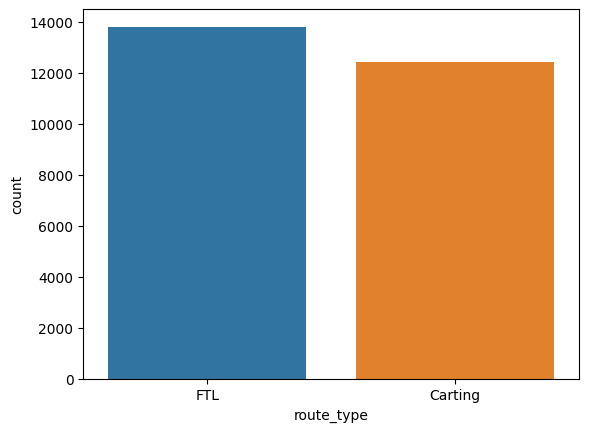

In [ ]:
sns.countplot(x=sub_journey_data['route_type'])
plt.show()

Insights:

1.   Maharastra and Karnataka are busiest state.
2.   In Maharashta the top 3 busiest cities are Mumbai,Bhiwandi,Pune
3.   In Karnataka, Busiest city is Bangaluru
4. longest routes are
                      1. Chandigarh to Bengaluru
                      2. Gurgaon to Poonamallee
                      3. Gurgaon to Bengaluru
                      4. Bhiwandi to Kolkata
5. fastest routes whose length are greater than 1000 kms
                      1. Gurgaon to Kolkata
                      2. Pune to Gurgaon
                      3. Surat to Bengaluru
                      4. Gurgaon to Pune







Creating New features for time

In [ ]:
sub_journey_data["year_trip_creation"]=sub_journey_data['trip_creation_time'].dt.year
sub_journey_data["month_trip_creation"]=sub_journey_data['trip_creation_time'].dt.month
sub_journey_data["day_trip_creation"]=sub_journey_data['trip_creation_time'].dt.day
sub_journey_data["hour_trip_creation"]=sub_journey_data['trip_creation_time'].dt.hour
sub_journey_data["dayname_trip_creation"]=sub_journey_data['trip_creation_time'].dt.day_name()

In [ ]:
sub_journey_data[["year_trip_creation","month_trip_creation","day_trip_creation","hour_trip_creation","dayname_trip_creation"]].head()

,year_trip_creation,month_trip_creation,day_trip_creation,hour_trip_creation,dayname_trip_creation
0,2018,9,12,0,Wednesday
1,2018,9,12,0,Wednesday
2,2018,9,12,0,Wednesday
3,2018,9,12,0,Wednesday
4,2018,9,12,0,Wednesday


Which Month records most trips?






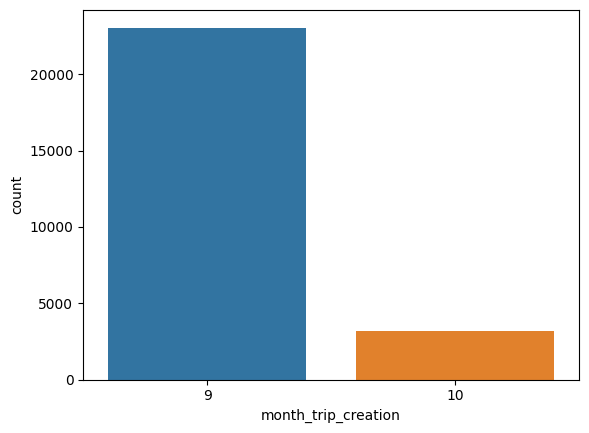

In [ ]:
sns.countplot(x=sub_journey_data['month_trip_creation'])
#as we have only 21 days long data, so we cant conclude anything about month
plt.show()

Which day creates most trips?

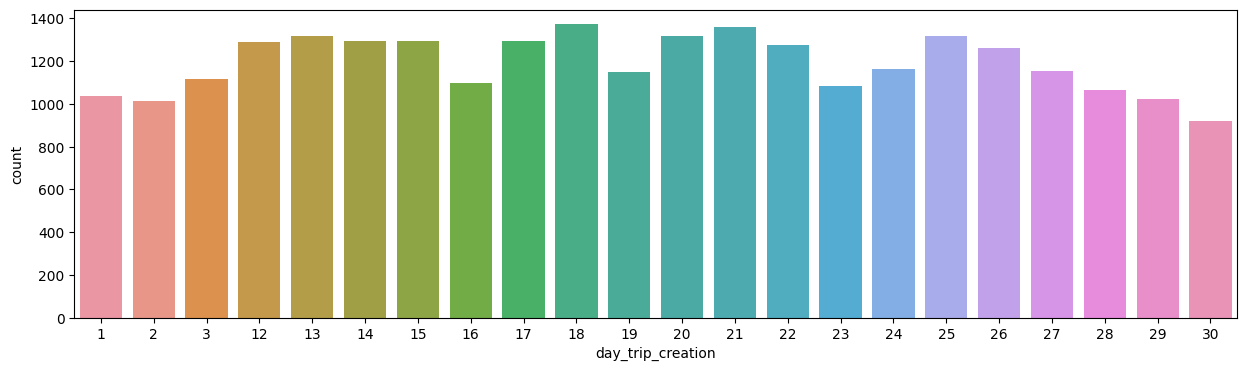

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(x=sub_journey_data['day_trip_creation'])
plt.show()
#trip creation is higher in middle of month dates compared to start and end

Which hour creates most trips?

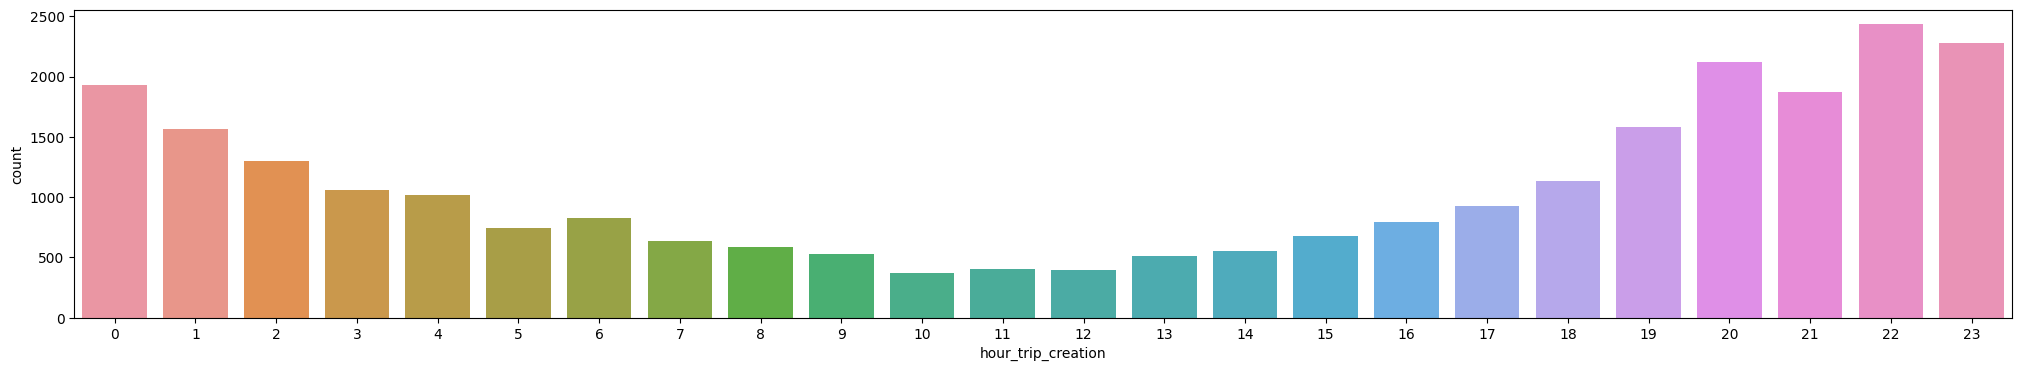

In [ ]:
plt.figure(figsize=(25,4))
sns.countplot(x=sub_journey_data['hour_trip_creation'])
plt.show()
##so most of the trips are created during evening to night time and least in daylight

which day of week creates most trips?

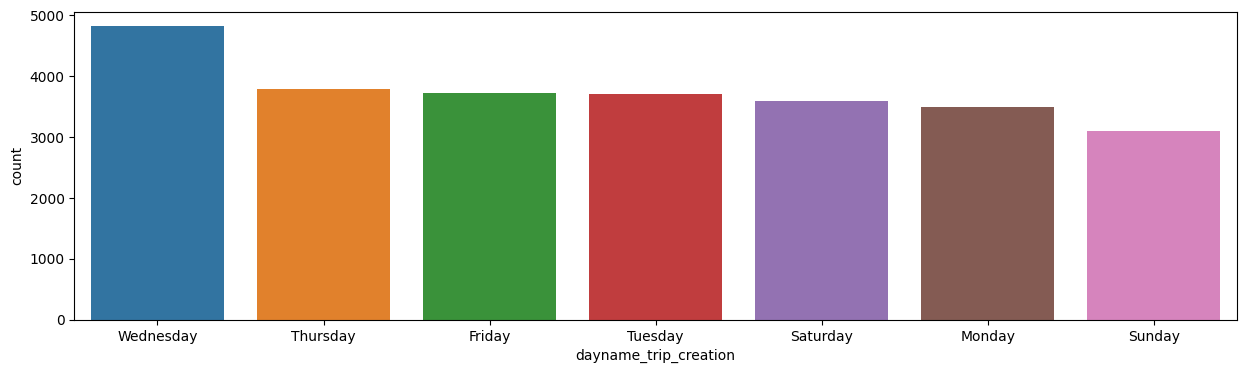

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(x=sub_journey_data['dayname_trip_creation'],
              order=sub_journey_data['dayname_trip_creation'].value_counts().index)
plt.show()
#hence Wednesday creates most trips

Insights:


        1.   trip creation is higher in middle of month dates compared to start and end
        2.   most of the trips are created during evening to night time and least in daylight
        3.   Trip creation is more on Wednesday compared to other days of week


Creating New Feature from Od_start time and Od_end_time

In [ ]:
sub_journey_data['diff_trip_endtime_starttime']=round((sub_journey_data['od_end_time']-sub_journey_data["od_start_time"]).dt.total_seconds()/60)

In [ ]:
sub_journey_data[['diff_trip_endtime_starttime',"start_scan_to_end_scan"]].head()

,diff_trip_endtime_starttime,start_scan_to_end_scan
0,1261.0,1260.0
1,1000.0,999.0
2,59.0,58.0
3,123.0,122.0
4,835.0,834.0


Hypothesis testing


In [ ]:
#H0: Both the features have same mean
#Ha mean of both features are significantly different
ttest_rel(sub_journey_data['diff_trip_endtime_starttime'],sub_journey_data["start_scan_to_end_scan"],alternative='two-sided')
#taking the significance value as 0.05, Here we failed to reject the null hypothesis
#which means both features gives the same information

TtestResult(statistic=30.443055510869854, pvalue=4.4955505880784445e-200, df=26221)

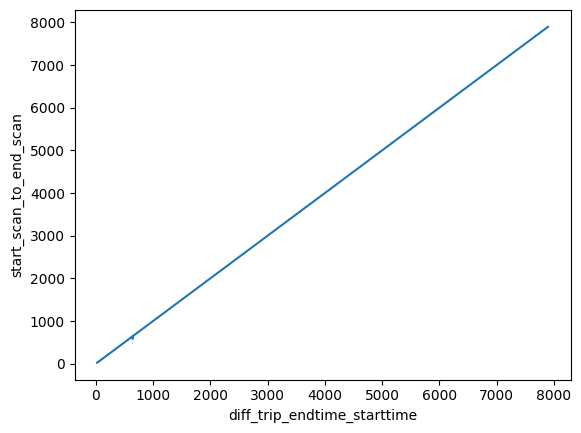

In [ ]:
#lets cross-check the above by line plot ideally it should be line with slope of 45 degrees
sns.lineplot(data=sub_journey_data,x='diff_trip_endtime_starttime',y="start_scan_to_end_scan")
plt.show()

# D. Outlier detection of Numerical columns

In [ ]:
num_cols=['start_scan_to_end_scan',
 'diff_trip_endtime_starttime',

 'osrm_time',
 'actual_time',

 'segment_osrm_time_cumsum',
 'segment_actual_time_cumsum',

 'osrm_distance',
 'segment_osrm_distance_cumsum',
 'actual_distance_to_destination',

 'route_speed'
 ]

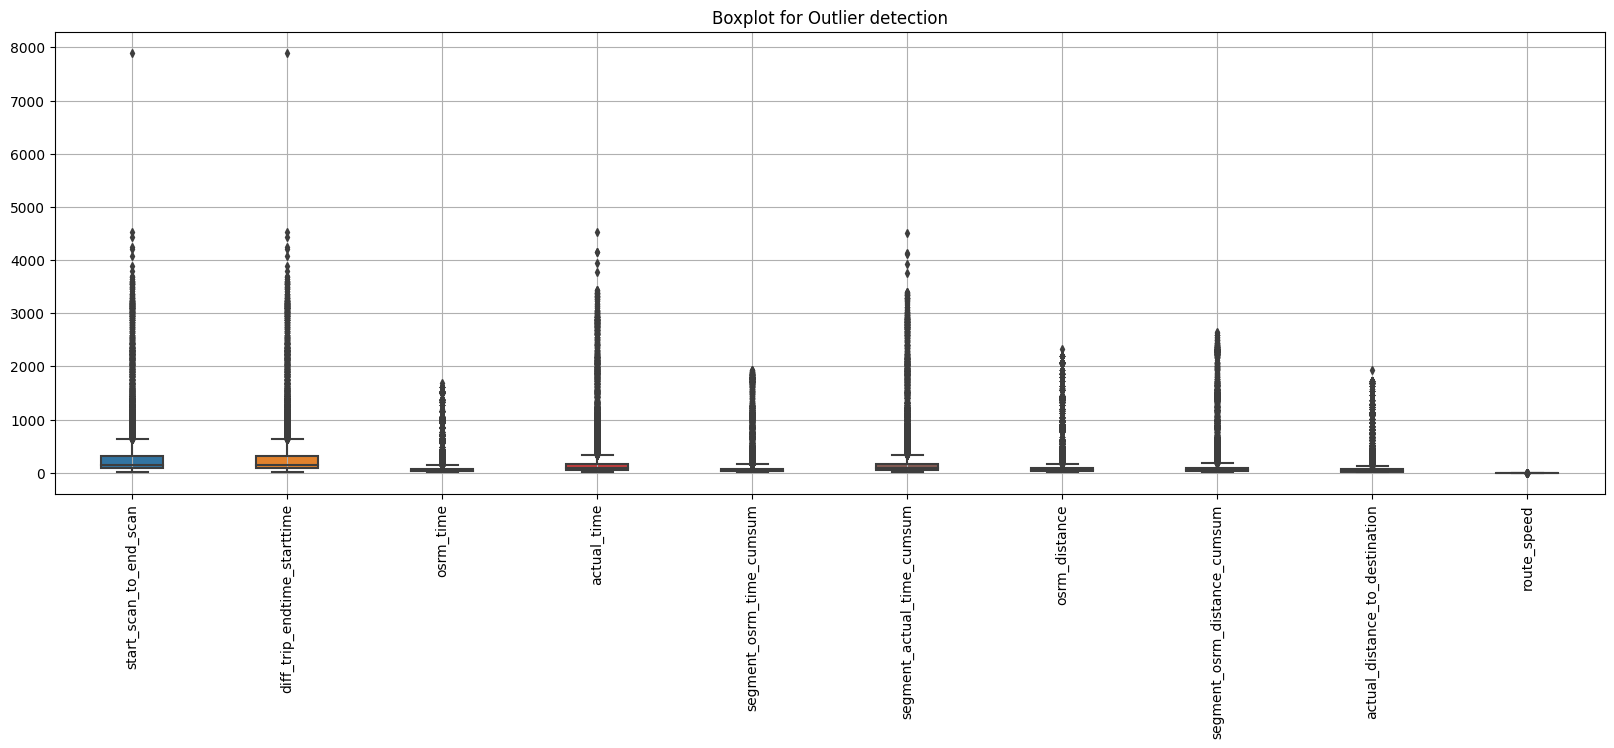

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(sub_journey_data[num_cols],width=0.4,fliersize=4)
plt.xticks(rotation=90)
plt.title('Boxplot for Outlier detection')
plt.grid()
plt.show()

Selecting which method to adopt to Handle the outlier? IQR method or Z score method

In [ ]:
sub_journey_data[num_cols].skew()
#Since most of the features are highly skewwed thus most suitable way to handle ouliers is IQR method

start_scan_to_end_scan            4.208328
diff_trip_endtime_starttime       4.208138
osrm_time                         5.102909
actual_time                       4.766458
segment_osrm_time_cumsum          5.218920
segment_actual_time_cumsum        4.761903
osrm_distance                     5.142338
segment_osrm_distance_cumsum      5.273394
actual_distance_to_destination    5.150166
route_speed                       0.156443
dtype: float64

Handling Outliers using IQR

In [ ]:
q1=sub_journey_data[num_cols].quantile(0.25)
q3=sub_journey_data[num_cols].quantile(0.75)

IQR=q3-q1
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR

In [ ]:
#percentage of outliers is 18% hecne we should try to cap the outlier instead of trimming them
(sub_journey_data[((sub_journey_data[num_cols]<lower_limit) | (sub_journey_data[num_cols]>upper_limit)).any(axis=1)].shape[0])*100/sub_journey_data.shape[0]

18.278544733429943

In [ ]:
#capping the outliers
for i in num_cols:
  sub_journey_data[i]=np.where(sub_journey_data[i]>upper_limit[i],
                     upper_limit[i],(
                     np.where(sub_journey_data[i]<lower_limit[i],
                              lower_limit[i],
                              sub_journey_data[i])
                     ))

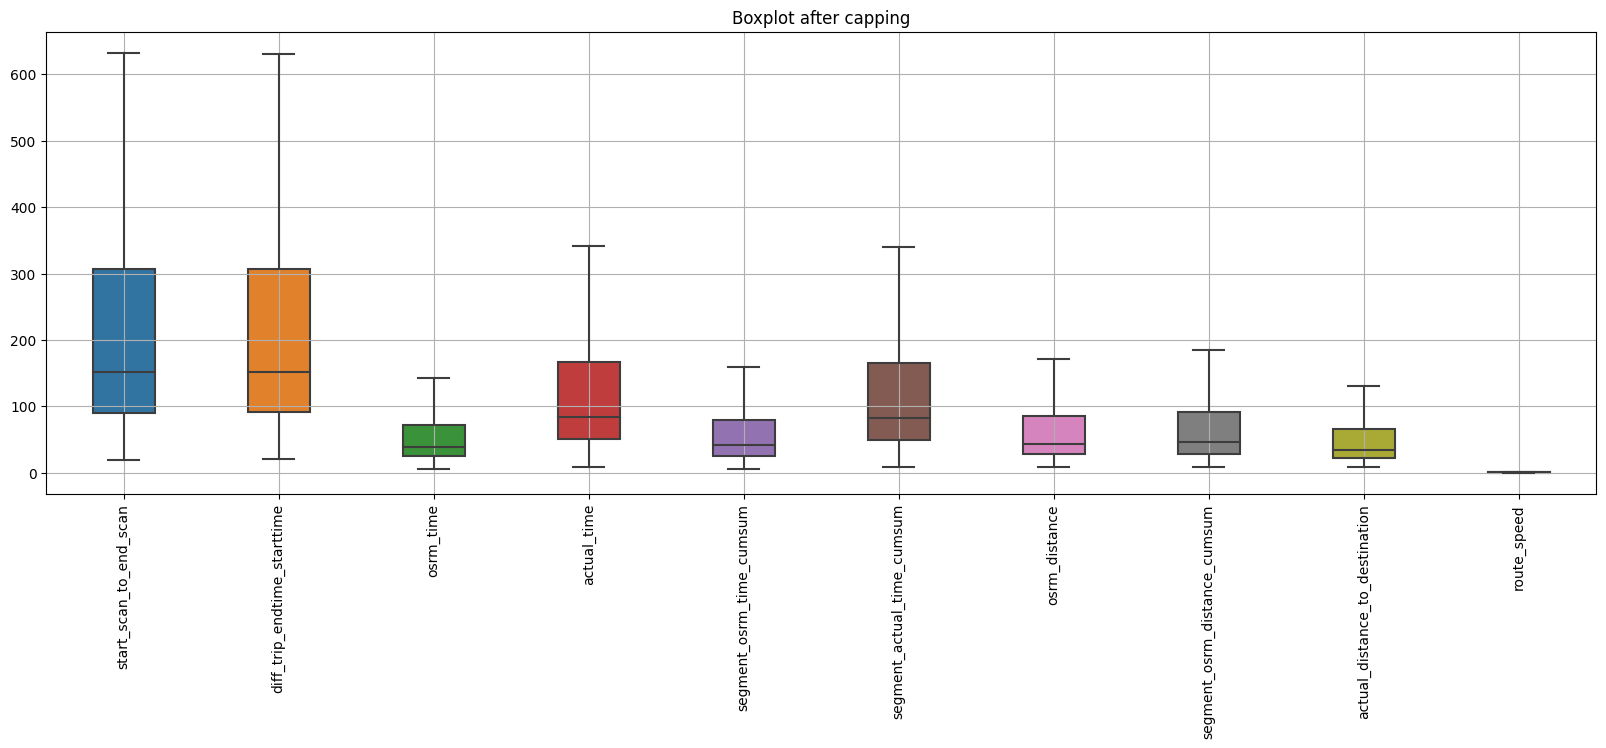

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(sub_journey_data[num_cols],width=0.4,fliersize=4)
plt.xticks(rotation=90)
plt.title('Boxplot after capping')
plt.grid()
plt.show()
#hence outliers are taken care of

#E. Handling Categoriacal values:

In [ ]:
sub_journey_data.dtypes

sub_journey_key                           object
data                                      object
trip_creation_time                datetime64[ns]
trip_uuid                                 object
route_schedule_uuid                       object
route_type                                object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
osrm_time                                float64
actual_time                              float64
segment_osrm_time_cumsum                 float64
segment_actual_time_cumsum               float64
osrm_distance                            float64
segment_osrm_distance_cumsum             float64
actual_distance_to_destination           float64
source_state        

In [ ]:
#it must be noted year,months,day,weeks etc should be considered as categorical value only thus must be included in cat_cols
#also unique keys should not be encoded here

sub_journey_data=sub_journey_data.astype({"year_trip_creation":object,
                                          "month_trip_creation":object,
                                          "day_trip_creation":object,
                                          "hour_trip_creation":object,
                                          "dayname_trip_creation":object})

In [ ]:
sub_journey_data.dtypes

sub_journey_key                           object
data                                      object
trip_creation_time                datetime64[ns]
trip_uuid                                 object
route_schedule_uuid                       object
route_type                                object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
osrm_time                                float64
actual_time                              float64
segment_osrm_time_cumsum                 float64
segment_actual_time_cumsum               float64
osrm_distance                            float64
segment_osrm_distance_cumsum             float64
actual_distance_to_destination           float64
source_state        

In [ ]:
#listing all the categorical features
cat_cols=sub_journey_data.loc[:,sub_journey_data.dtypes==object].columns
cat_cols

Index(['sub_journey_key', 'data', 'trip_uuid', 'route_schedule_uuid',
       'route_type', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'source_state', 'source_city', 'source_place',
       'source_code', 'destination_state', 'destination_city',
       'destination_place', 'destination_code', 'year_trip_creation',
       'month_trip_creation', 'day_trip_creation', 'hour_trip_creation',
       'dayname_trip_creation'],
      dtype='object')

In [ ]:
#we dont need to encode unique values do remove them
cat_cols=np.hstack((cat_cols[4],cat_cols[9:]))
cat_cols

array(['route_type', 'source_state', 'source_city', 'source_place',
       'source_code', 'destination_state', 'destination_city',
       'destination_place', 'destination_code', 'year_trip_creation',
       'month_trip_creation', 'day_trip_creation', 'hour_trip_creation',
       'dayname_trip_creation'], dtype=object)

In [ ]:
#checkin number of unique values to decide suitable encoding technique
unique_dict={}
for i in cat_cols:
  k=sub_journey_data[i].nunique()
  unique_dict[i]=k
unique_dict
##most of these categorical columns have very high no of unique values except few

{'route_type': 2,
 'source_state': 31,
 'source_city': 1256,
 'source_place': 1235,
 'source_code': 66,
 'destination_state': 32,
 'destination_city': 1252,
 'destination_place': 1215,
 'destination_code': 60,
 'year_trip_creation': 1,
 'month_trip_creation': 2,
 'day_trip_creation': 22,
 'hour_trip_creation': 24,
 'dayname_trip_creation': 7}

label encoding

In [ ]:
from  sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
sub_journey_data['route_type']=label_encoder.fit_transform(sub_journey_data['route_type'])


In [ ]:
cat_cols=cat_cols[1:]
cat_cols

array(['source_state', 'source_city', 'source_place', 'source_code',
       'destination_state', 'destination_city', 'destination_place',
       'destination_code', 'year_trip_creation', 'month_trip_creation',
       'day_trip_creation', 'hour_trip_creation', 'dayname_trip_creation'],
      dtype=object)

Target Encoding

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.6 MB/s eta 0:00:00


In [ ]:
from category_encoders import TargetEncoder

In [ ]:
targetencoder=TargetEncoder()

In [ ]:
sub_journey_data[cat_cols]=targetencoder.fit_transform(sub_journey_data[cat_cols],sub_journey_data['route_speed'])

In [ ]:
sub_journey_data.head()

,sub_journey_key,data,trip_creation_time,trip_uuid,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,osrm_time,actual_time,segment_osrm_time_cumsum,segment_actual_time_cumsum,osrm_distance,segment_osrm_distance_cumsum,actual_distance_to_destination,source_state,source_city,source_place,source_code,destination_state,destination_city,destination_place,destination_code,route_speed,year_trip_creation,month_trip_creation,day_trip_creation,hour_trip_creation,dayname_trip_creation,diff_trip_endtime_starttime
0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,trip-153671041653548748,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,1,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,632.5,142.5,341.0,160.0,340.0,172.03115,184.915287,131.412259,0.453614,0.468971,0.460225,0.520801,0.492454,0.499533,0.502477,0.447124,0.527142,0.466664,0.465846,0.44112,0.463101,0.46126,631.0
1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,trip-153671041653548748,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,1,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,632.5,142.5,341.0,160.0,340.0,172.03115,184.915287,131.412259,0.477020,0.368985,0.432958,0.483781,0.452606,0.424981,0.442751,0.447987,0.537773,0.466664,0.465846,0.44112,0.463101,0.46126,631.0
2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,trip-153671042288605164,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,0,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,26.0,47.0,26.0,46.0,28.19940,28.199500,24.644021,0.465540,0.516602,0.516602,0.482877,0.466946,0.514955,0.514955,0.509220,0.535740,0.466664,0.465846,0.44112,0.463101,0.46126,59.0
3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,trip-153671042288605164,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,0,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,42.0,96.0,39.0,95.0,56.91160,55.989900,48.542890,0.465540,0.508735,0.508735,0.490676,0.466946,0.510306,0.510306,0.509220,0.510978,0.466664,0.465846,0.44112,0.463101,0.46126,123.0
4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,trip-153671043369099517,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,1,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,632.5,142.5,341.0,160.0,340.0,172.03115,184.915287,131.412259,0.495331,0.492902,0.493972,0.461562,0.570505,0.512131,0.509937,0.457849,0.390526,0.466664,0.465846,0.44112,0.463101,0.46126,631.0


In [ ]:
sub_journey_data.drop(columns=["sub_journey_key","trip_creation_time","trip_uuid","route_schedule_uuid",
                               "source_center","source_name","destination_center","destination_name",
                               "od_start_time","od_end_time"],inplace=True)

In [ ]:
sub_journey_data.head()

,data,route_type,start_scan_to_end_scan,osrm_time,actual_time,segment_osrm_time_cumsum,segment_actual_time_cumsum,osrm_distance,segment_osrm_distance_cumsum,actual_distance_to_destination,source_state,source_city,source_place,source_code,destination_state,destination_city,destination_place,destination_code,route_speed,year_trip_creation,month_trip_creation,day_trip_creation,hour_trip_creation,dayname_trip_creation,diff_trip_endtime_starttime
0,training,1,632.5,142.5,341.0,160.0,340.0,172.03115,184.915287,131.412259,0.453614,0.468971,0.460225,0.520801,0.492454,0.499533,0.502477,0.447124,0.527142,0.466664,0.465846,0.44112,0.463101,0.46126,631.0
1,training,1,632.5,142.5,341.0,160.0,340.0,172.03115,184.915287,131.412259,0.477020,0.368985,0.432958,0.483781,0.452606,0.424981,0.442751,0.447987,0.537773,0.466664,0.465846,0.44112,0.463101,0.46126,631.0
2,training,0,58.0,26.0,47.0,26.0,46.0,28.19940,28.199500,24.644021,0.465540,0.516602,0.516602,0.482877,0.466946,0.514955,0.514955,0.509220,0.535740,0.466664,0.465846,0.44112,0.463101,0.46126,59.0
3,training,0,122.0,42.0,96.0,39.0,95.0,56.91160,55.989900,48.542890,0.465540,0.508735,0.508735,0.490676,0.466946,0.510306,0.510306,0.509220,0.510978,0.466664,0.465846,0.44112,0.463101,0.46126,123.0
4,training,1,632.5,142.5,341.0,160.0,340.0,172.03115,184.915287,131.412259,0.495331,0.492902,0.493972,0.461562,0.570505,0.512131,0.509937,0.457849,0.390526,0.466664,0.465846,0.44112,0.463101,0.46126,631.0


#F. Feature Scaling:

Checking the distribution of features to decide suitable Scaling technique

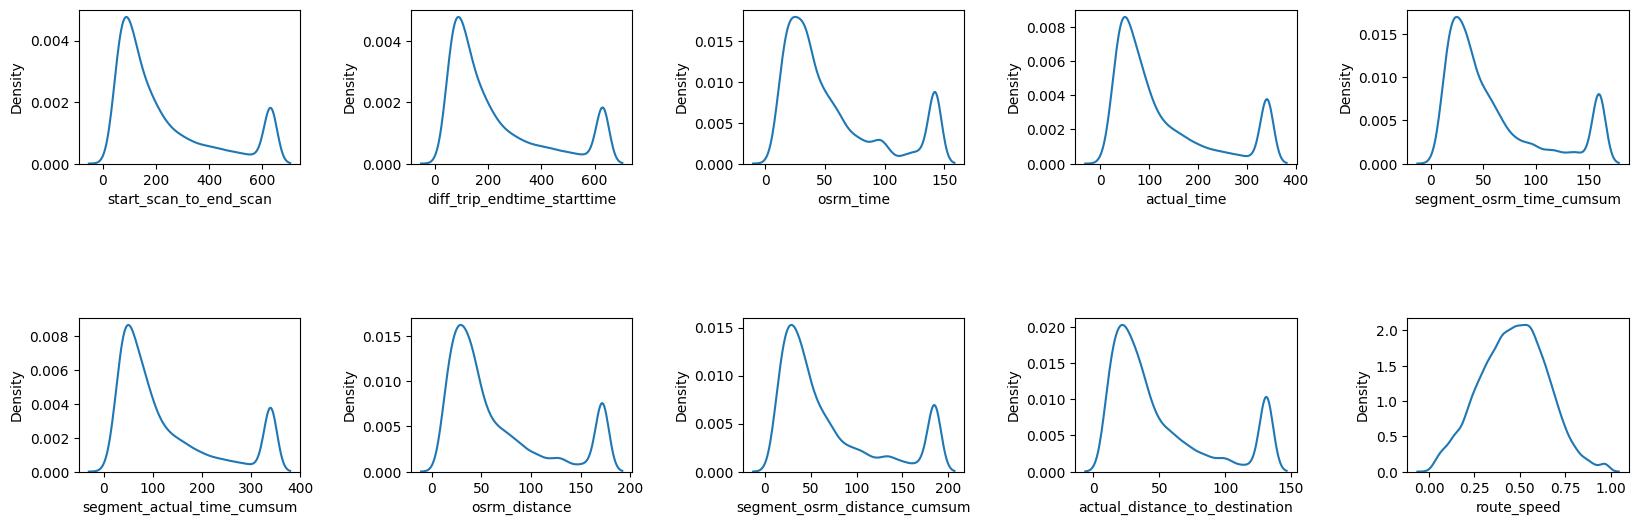

In [ ]:
plt.figure(figsize=(20,6))
j=1
for i in num_cols:
  plt.subplot(2,5,j)
  sns.kdeplot(data=sub_journey_data[num_cols],x=i)
  j+=1
plt.subplots_adjust(wspace=0.5,hspace=1)
plt.show()

In [ ]:
#distribution of All the features except route speed are skewwed hence we should prefer normalization over standardization
cols=sub_journey_data.columns
cols=cols[1:]

**F.2 Feature Scaling using Normalization: Min_Max Scaler (B/c skewwed distribution)**

In [ ]:
#since data is skewed hence we will use Normalization using min_max_scaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_sub_journey_data=sub_journey_data[sub_journey_data['data']=='training']

In [ ]:
scaler=MinMaxScaler()

In [ ]:
scaler.fit(train_sub_journey_data[cols])

MinMaxScaler()

In [ ]:
sub_journey_data[cols]=scaler.transform(sub_journey_data[cols])

In [ ]:
sub_journey_data.head()

,data,route_type,start_scan_to_end_scan,osrm_time,actual_time,segment_osrm_time_cumsum,segment_actual_time_cumsum,osrm_distance,segment_osrm_distance_cumsum,actual_distance_to_destination,source_state,source_city,source_place,source_code,destination_state,destination_city,destination_place,destination_code,route_speed,year_trip_creation,month_trip_creation,day_trip_creation,hour_trip_creation,dayname_trip_creation,diff_trip_endtime_starttime
0,training,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.570317,0.502093,0.469635,0.527421,0.681797,0.602240,0.597122,0.600002,0.538646,0.0,0.0,0.0,0.636253,0.231615,1.000000
1,training,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.644012,0.309916,0.416455,0.444649,0.519346,0.424794,0.450408,0.602557,0.549661,0.0,0.0,0.0,0.636253,0.231615,1.000000
2,training,0.0,0.062041,0.146520,0.111782,0.129870,0.109091,0.117371,0.108771,0.127788,0.607868,0.593642,0.579590,0.442627,0.577805,0.638947,0.627774,0.783771,0.547554,0.0,0.0,0.0,0.636253,0.231615,0.062295
3,training,0.0,0.166531,0.263736,0.259819,0.214286,0.257576,0.293564,0.266813,0.323023,0.607868,0.578521,0.564246,0.460065,0.577805,0.627880,0.616352,0.783771,0.521899,0.0,0.0,0.0,0.636253,0.231615,0.167213
4,training,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.701666,0.548090,0.535454,0.394968,1.000000,0.632225,0.615447,0.631742,0.397102,0.0,0.0,0.0,0.636253,0.231615,1.000000


In [ ]:
sub_journey_data.describe()

,route_type,start_scan_to_end_scan,osrm_time,actual_time,segment_osrm_time_cumsum,segment_actual_time_cumsum,osrm_distance,segment_osrm_distance_cumsum,actual_distance_to_destination,source_state,source_city,source_place,source_code,destination_state,destination_city,destination_place,destination_code,route_speed,year_trip_creation,month_trip_creation,day_trip_creation,hour_trip_creation,dayname_trip_creation,diff_trip_endtime_starttime
count,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000,26222.0,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000
mean,0.526199,0.340365,0.359360,0.349568,0.352540,0.347784,0.341143,0.340153,0.335957,0.612121,0.487658,0.479737,0.409333,0.577220,0.495380,0.487724,0.660413,0.475987,0.0,0.000817,0.551497,0.663082,0.473421,0.340626
std,0.499323,0.303342,0.300717,0.307062,0.308336,0.307020,0.311460,0.313333,0.316946,0.186604,0.136338,0.135447,0.094351,0.234125,0.169821,0.172842,0.129820,0.187536,0.0,0.002205,0.202951,0.233274,0.284059,0.303874
min,0.000000,0.000000,0.000000,-0.003021,0.000000,-0.003030,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.114286,0.139194,0.123867,0.123377,0.121212,0.114423,0.110077,0.103363,0.483886,0.424158,0.400330,0.394968,0.341534,0.424794,0.385668,0.578257,0.343318,0.0,0.000000,0.490682,0.614351,0.231615,0.114754
50%,1.000000,0.215510,0.241758,0.223565,0.233766,0.221212,0.211531,0.208850,0.212750,0.607868,0.479166,0.477619,0.442627,0.577805,0.497378,0.482597,0.631742,0.480288,0.0,0.000000,0.556792,0.732203,0.521550,0.214754
75%,1.000000,0.468571,0.483516,0.474320,0.474026,0.472727,0.468654,0.466046,0.462018,0.745959,0.565807,0.549447,0.444649,0.767190,0.602240,0.597122,0.783771,0.605991,0.0,0.000000,0.665957,0.807043,0.672348,0.468852
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.006766,1.000000,1.000000,1.000000,1.000000


# Insights:

            1.   The estimates of osrm system are not matching with actual value of time and distance at trip as well as sub journey level.
            2.   osrm estimates are poor for Carting and fine for FTL
            3.   the average time taken to complete a trip is 1075
            4.   the average distance of trip is 581 where as osrm estimated 788
            5.   the Busiest state is Maharashtra followed by Karnataka
            6.   The Busiest cities of Maharashtra is Mumbai,Bhiwandi and Pune
            7.   The Busiest city of Karnataka is Bengaluru. there is no significant traffic in other cities of Karnataka.
            8.   Cities which records highest origin of trips are
                                                        1.   Bengaluru
                                                        2.   Gurgaon
                                                        3.   Mumbai
                                                        4.   Bhiwandi
                                                        5.   Delhi
            9. Cities which records highest as destination of trips are
                                                        1.   Bengaluru
                                                        2.   Mumbai
                                                        3.   Gurgaon
                                                        4.   Hydrabad
                                                        5.   Bhiwandi
            10.   The longest routes are
                                  1. Chandigarh to Bengaluru
                                  2. Gurgaon to Poonamallee
                                  3. Gurgaon to Bengaluru
                                  4. Bhiwandi to Kolkata
            11.   fastest routes whose length are greater than 1000 kms are
                                                          1. Gurgaon to Kolkata
                                                          2. Pune to Gurgaon
                                                          3. Surat to Bengaluru
                                                          4. Gurgaon to Pune
            12. trips are created more in middle of month as compared to starting & end of month
            13. trips creation is higher during night time compared to day time.
            14. Wednesday records more trip creation compared to any other day of week.

# Recommendations:


1.   since the Osrm estimates are not matching with actual values, so there may be some discrepancies in routing engine. Needs to be resolved.
2. In particular, OSRM estimates are poor for Carting freight whereas its estimates are fair for full truck freight. it is recommended that osrm system should encorporate differentiation between FTL and carting.

3.   Mumbai, Bengaluru, Gurgaon, Bhiwandi  have significantly both directional higher traffic, so we should plan resources in these cities.
4. There is significantly low traffic in Eastern side of India, although Gurgaon to Kolkata is one of fastest route. So may look to explore more in this corridor.
5. Gurgaon is one of the city which connect faster routes so may plan resources to utilize this availablity of faster route.


